# Tutorials

 This interactive tutorial demonstrates usage of sub-packages of the [imate](https://ameli.github.io/imate/index.html) in the following sections:
 
* [Generate Sample Matrices](#Generate-Sample-Matrices)
* [Compute Log Determinant](#Compute-Log-Determinant)
* [Compute Trace of Inverse](#Compute-Trace-of-Inverse)
* [Interpolate Trace of Invrse](#Interpolate-Trace-of-Inverse)

A full user guide for each of the modules in the above can be found in the following documentatoin links:
 
 * [`imate.GenerateMatrix`](https://ameli.github.io/imate/GenerateMatrix.html) 
 * [`imate.ComputeLogDeterminant`](https://ameli.github.io/imate/ComputeLogDeterminant.html) 
 * [`imate.ComputeTraceOfInverse`](https://ameli.github.io/imate/ComputeTraceOfInverse.html) 
 * [`imate.InterpolateTraceOfInverse`](https://ameli.github.io/imate/InterpolateTraceOfInverse.html) 

# Generate Sample Matrices

## Dense Matrixes

We demonstrate the examples that follows on two symmetric and positive-definite matrices. We generate two sample correlation matrices of the size $(20^2,20^2)$ using [`TraceInv.GenerateMatrix`](https://ameli.github.io/TraceInv/GenerateMatrix.html) as shown below.

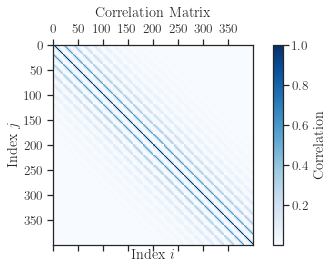

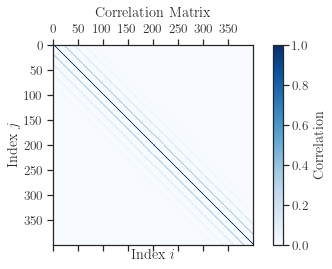

In [1]:
from TraceInv import GenerateMatrix

# Generate symmetric and positive-definite matrices
A = GenerateMatrix(NumPoints=20,DecorrelationScale=0.10,Plot=True)    # See the first plot below
B = GenerateMatrix(NumPoints=20,DecorrelationScale=0.05,Plot=True)    # See the second plot below

To make matrices $\mathbf{A}$ and $\mathbf{B}$ distrinct, we used to different values for the argument ``DecorrelationScale``, which sets the correlation of the elements of the matrix. A matrix with smaller decorrelation scale tends to be closer to the identity matrix (such as the matrix $\mathbf{B}$ in the above).

## Sparse Matrices

In addition to the two matrices inthr above, we also need to create a sparse matrix. This can be done by passing ``UseSparse=True`` parameter. If the size of the matrix is large (larger than in our example), you may enable ``RunInParallel=True``. To get more information of the genertaed matrix, set ``Verbose=True``.

Using sparse correlation matrix with kernel threshold: 0.0300 and sparsity: 0.0325


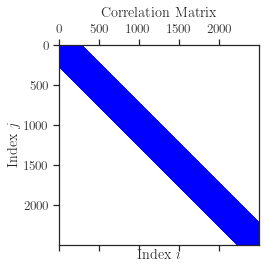

In [2]:
A_sparse = GenerateMatrix(NumPoints=50,KernelThreshold=0.03,DecorrelationScale=0.03, \
                          UseSparse=True,RunInParallel=True,Plot=True,Verbose=True)

The above matrix has the shape $(50^2,50^2)$ and sparse density $0.0325$. The plot of the sparse matrix is binary, that is, it only shows the non-zero elements with one color, regadless of their values.

# Compute Log Determinant

Using the `TraceInv.ComputeLogDeterminant` module, we can compute the log-determinant of dense or sparse matrices.

## Dense Matrix

By default, this module uses the Cholesky decomposition, as shown below. The Cholesky decomposition method yields an accurate output.

In [4]:
from TraceInv import ComputeLogDeterminant

# Use default Cholesky method
%time D1 = ComputeLogDeterminant(A,ComputeMethod='cholesky')

CPU times: user 4.87 ms, sys: 0 ns, total: 4.87 ms
Wall time: 3.96 ms


In contrast to the exact output with the Cholesky decomposition, we can also employ randomized trace estimators, namely, the stochastic Lanczos quadrature (SLQ) method. In the code below, we apply SLQ method, once using Lanczos tri-diagonalization, and once using Golub-Kahn bi-diagonalization.

In [14]:
# Use stochastic Lanczos quadrature method
%time D2 = ComputeLogDeterminant(A,ComputeMethod='SLQ', \
                                 NumIterations=50, \
                                 LanczosDegree=30, \
                                 UseLanczosTridiagonalization=True)

# Use stochastic Lanczos quadrature method
%time D3 = ComputeLogDeterminant(A,ComputeMethod='SLQ', \
                                 NumIterations=50, \
                                 LanczosDegree=30, \
                                 UseLanczosTridiagonalization=False)

CPU times: user 239 ms, sys: 0 ns, total: 239 ms
Wall time: 238 ms
CPU times: user 369 ms, sys: 0 ns, total: 369 ms
Wall time: 368 ms


## Sparse Matrix

We repeate the above methods with sparse matrix ``A_sparse``.

In [13]:
# Choesky method
%time D1_sparse = ComputeLogDeterminant(A_sparse,ComputeMethod='cholesky')

# Stochastic Lanczos quadrature with Lanczos tri-diagonalization
%time D2_sparse = ComputeLogDeterminant(A_sparse,ComputeMethod='SLQ', \
                                        NumIterations=50, \
                                        LanczosDegree=30, \
                                        UseLanczosTridiagonalization=True)

# Stochastic Lanczos quadrature with Lanczos tri-diagonalization
%time D3_sparse = ComputeLogDeterminant(A_sparse,ComputeMethod='SLQ', \
                                        NumIterations=50, \
                                        UseLanczosTridiagonalization=False)

CPU times: user 228 ms, sys: 11.8 ms, total: 240 ms
Wall time: 242 ms
CPU times: user 802 ms, sys: 0 ns, total: 802 ms
Wall time: 802 ms
CPU times: user 989 ms, sys: 0 ns, total: 989 ms
Wall time: 1 s


# Compute Trace of Inverse

The module [`TraceInv.ComputeTraceOfInverse`](https://ameli.github.io/TraceInv/ComputeTraceOfInverse.html) computes the trace of inverse of a matrix, here $\mathbf{A} + t \mathbf{B}$.

In [1]:
from TraceInv import ComputeTraceOfInverse
from TraceInv import GenerateMatrix

# Generate symmetric and positive-definite matrices
A = GenerateMatrix(NumPoints=20,DecorrelationScale=0.10)    # See the first plot below
B = GenerateMatrix(NumPoints=20,DecorrelationScale=0.05)

t = 1
# %time Trace = ComputeTraceOfInverse(A+t*B)
%time Trace = ComputeTraceOfInverse(A+t*B,ComputeMethod='SLQ',NumIterations=100,LanczosDegree=100,UseLanczosTridiagonalization=True)
print(Trace)

CPU times: user 3.29 s, sys: 679 ms, total: 3.97 s
Wall time: 1.05 s
363.7543873281957


Now, we compute the trace for an array of the parameters $t$ and measure the processing time.

In [17]:
# Specify inquiry points t
import numpy
a,b,N = -3,3,1000
t = numpy.logspace(a,b,N)

# Compute trace of A+tB (NOTE: this may take few minutes)
%time Trace = [ComputeTraceOfInverse(A+t[i]*B) for i in range(t.size)]

CPU times: user 11.9 s, sys: 17.5 ms, total: 11.9 s
Wall time: 11.9 s


We plot the results below.

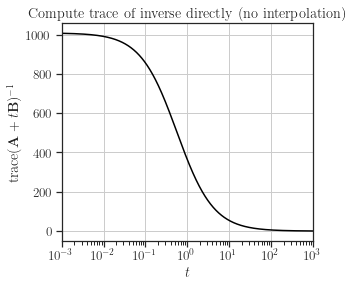

In [18]:
# Plot results
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(4.5,4))
ax.semilogx(t,Trace,color='black')
ax.set_xlim([t[0],t[-1]])
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'trace$(\mathbf{A} + t\mathbf{B})^{-1}$')
ax.set_title('Compute trace of inverse directly (no interpolation)')
ax.grid(True)
plt.show()

# Interpolate Trace of Inverse

For two invertible matrices $\mathbf{A}$ and $\mathbf{B}$, the purpose of ``TraceInv.InterpolateTraceOfInverse`` module is to interpolate the function
 
$$t \mapsto \mathrm{trace} (\mathbf{A} +  t \mathbf{B})^{-1},$$
    
for a fixed parameter $t$ or in an interval $t \in [a,b]$. 

### Using Root Monomial Basis Functions Method



In [19]:
# Specify interpolation points and the inquiry point
InterpolantPoints = [1e-3,1e-2,1e-1,1,1e+1,1e+2,1e+3]

# Create interpolation object, then interpolate array t
from TraceInv import InterpolateTraceOfInverse
%time RMBF = InterpolateTraceOfInverse(A,B,InterpolantPoints)

CPU times: user 120 ms, sys: 7.9 ms, total: 128 ms
Wall time: 126 ms


Now, we interpolate the trace for the array ``t``:

In [21]:
# Create an array of inquiry points
import numpy
a,b,N = -3,3,1000
t = numpy.logspace(a,b,N)

# Interpolate
%timeit Trace2 = RMBF.Interpolate(t)

571 ms ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Plotting the results is easy. Simply, pass the option ``Plot=True`` in the argument of ``Interpolate()`` function. Moreover, to compare the interpolated values with the exact computation (i.e. direct computation of trace without interpolation), simply pass the asrgument ``CompareWithExact=True`` as shown below:

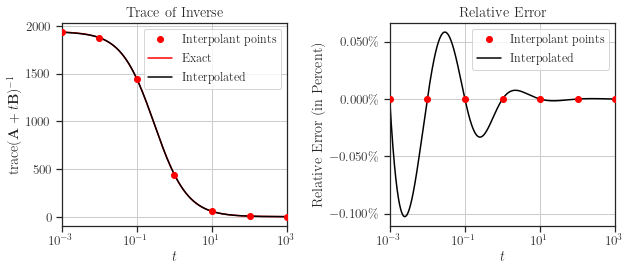

In [19]:
Trace2 = RMBF.Interpolate(t,CompareWithExact=True,Plot=True)

### Using Rational Polynomial Functions Method

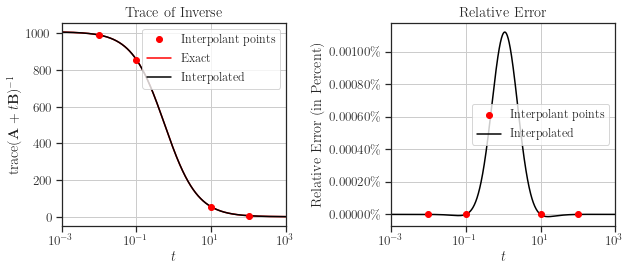

In [23]:
# The RPF method can only accept 2 or 4 interpolant points
InterpolantPoints = [1e-2,1e-1,1e+1,1e+2]

# Create an interpolator object
RPF = InterpolateTraceOfInverse(A,B,InterpolantPoints,InterpolationMethod='RPF')

# Interpolate on the array of inquiry points
Trace3 = RPF.Interpolate(t,CompareWithExact=True,Plot=True)